In [1]:
import scraper
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data
### Carbon data

In [75]:
full_carbon_df, tables = scraper.get_eurostat_dataframe("env_ac_ainah_r2", lambda raw: np.arange(1, 66))
full_carbon_df.head()

table            1                                                      \
time          1995         1996         1997         1998         1999   
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4      15662060.68  17983724.22  16436561.98  16404974.32  15656406.16   

table                                                                   ...  \
time          2000         2001         2002         2003         2004  ...   
0              NaN          NaN          NaN          NaN          NaN  ...   
1              NaN          NaN          NaN          NaN          NaN  ...   
2              NaN          NaN          NaN          NaN          NaN  ...   
3              NaN          NaN          NaN          NaN          NaN  ...   
4      15526465.86  15575519.99  15742121.31  17348358.89  16463321.94  ...   

table         65                                                         \
time        2014       2015       2016       2017       2018       2019   
0      416329.05  411485.90  413749.45  419976.61  426307.90  416848.48   
1      705507.53  680904.05  668832.49  646120.22  672691.73  674474.81   
2      371707.83  401866.25  435213.07  426494.22  423259.56  393891.37   
3      314720.03  316332.36  329274.64  336949.27  354343.90  350563.81   
4      415245.59  421010.26  481782.63  511782.05  503125.28  487706.80   

table                                     country  
time        2020       2021       2022             
0      398982.10  412683.08  384901.69  EU27_2020  
1      601207.60  615594.09  559118.99         BE  
2      391756.15  402387.56  386451.29         BG  
3      330125.94  354575.61  323965.99         CZ  
4      507731.62  502221.23  479131.26         DK  

[5 rows x 1821 columns]

In [95]:
df_carbon_short = full_carbon_df.xs(1, level="table", axis=1).T
df_carbon_short.columns = full_carbon_df.xs("country", axis=1)
df_carbon_short.head()

country,EU27_2020,BE,BG,CZ,DK,DE,EE,IE,EL,ES,...,RO,SI,SK,FI,SE,IS,NO,CH,RS,TR
time,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,15662060.68,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8862865.42,NaN,NaN,12571199.07,NaN,5183706.31,NaN,NaN
1996,NaN,NaN,NaN,NaN,17983724.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8821817.28,NaN,NaN,13419521.77,NaN,5238820.25,NaN,NaN
1997,NaN,NaN,NaN,NaN,16436561.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8693803.51,NaN,NaN,14045761.23,NaN,5112279.33,NaN,NaN
1998,NaN,NaN,NaN,NaN,16404974.32,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8542440.41,NaN,NaN,14424047.34,NaN,5276437.22,NaN,NaN
1999,NaN,NaN,NaN,NaN,15656406.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8310800.34,NaN,NaN,15414605.09,NaN,5237620.84,NaN,NaN


In [96]:
# Drop the rows until 2008 - when the data really begins
df_carbon_short.drop([str(i) for i in np.arange(1995, 2008)], inplace=True)
df_carbon_short = df_carbon_short.drop("CH", axis=1)
df_carbon_short.head()

country,EU27_2020,BE,BG,CZ,DK,DE,EE,IE,EL,ES,...,PT,RO,SI,SK,FI,SE,IS,NO,RS,TR
time,,,,,,,,,,,,,,,,,,,,,
2008,8626928.75,9840862.32,8374278.10,12088284.26,18472875.79,10115618.26,15495691.70,11599639.01,11023011.51,7309667.12,...,6489677.15,6792814.40,8093935.35,8115433.15,12652929.15,6147808.43,17704691.59,12308807.83,NaN,NaN
2009,7851179.61,8740690.23,7277828.03,11049662.42,17176547.55,9321295.50,12786692.77,10448510.06,10354690.72,6435677.13,...,6178248.19,5751828.40,7375583.00,7304968.32,12003558.20,5514200.84,16180654.34,11368305.58,NaN,NaN
2010,8024312.00,9243216.52,7673499.85,11228220.11,16767331.74,9667309.77,16307459.75,12043627.47,9989268.71,6098359.65,...,5739881.60,5581717.18,7437534.55,7305820.30,13441161.42,6147726.61,16184246.73,11861900.26,NaN,NaN
2011,7901995.31,8519668.04,8424931.82,10997932.47,16608386.02,9668751.22,16334728.68,11509752.46,9620522.32,6223872.41,...,5697688.64,5895533.44,7280437.24,7294510.54,11997445.75,5607249.35,15554875.78,12700895.28,NaN,NaN
2012,7728876.39,8149775.00,7808042.43,10544785.70,15347310.62,9767753.13,15694048.49,11892306.47,9558049.09,6157580.45,...,5624083.12,5748566.83,6938559.08,6765294.90,10873832.79,5236450.88,15875505.99,12425877.26,NaN,NaN


In [97]:
# Plot the carbon emissions scatterplot
px.scatter(df_carbon_short)

In [27]:
sns.pairplot(df_carbon_short)

### Energy data

In [189]:
full_energy_df, energy_tables = scraper.get_eurostat_dataframe("nrg_cb_e", lambda raw: ["AFC", "FC_IND_E", "FC_TRA_E", "FC_OTH_CP_E", "FC_OTH_HH_E"])
full_energy_df.head()

table       AFC                                                              \
time       1990      1991      1992      1993      1994      1995      1996   
0      218484.0  178925.0  175263.0  175606.0  169048.0  181335.0  193531.0   
1      146824.0  137183.0  133881.0  141083.0  144691.0  152598.0  152735.0   
2        4785.0    4998.0    5849.0    7590.0    9053.0    9398.0    9637.0   
3        5387.0    3083.0    3289.0    1630.0    1173.0    1961.0    1803.0   
4        8179.0    7194.0    6156.0    5952.0    5415.0    6722.0    8811.0   

table                                ... FC_OTH_HH_E                    \
time       1997      1998      1999  ...        2014     2015     2016   
0      194520.0  187928.0  214365.0  ...     415.685  628.687  542.327   
1      160130.0  160913.0  181350.0  ...      49.422   84.733   45.143   
2        9975.0    7828.0    9059.0  ...       0.000    0.000    0.000   
3         785.0     564.0    1670.0  ...       0.000    0.000    0.000   
4        9013.0    8383.0    8983.0  ...       1.307    1.961    2.288   

table                                                             country  
time      2017     2018     2019      2020      2021      2022             
0      611.261  560.179  687.335  1220.556  1316.017  1457.559  EU27_2020  
1       51.247   61.076   64.421    50.728    65.282   176.339       EA20  
2        0.000    0.000    0.000     0.000     0.000     0.000         BE  
3        0.000    0.000    0.000     0.000     0.000     0.000         BG  
4        4.047    4.520    5.012     3.610    11.808    23.064         CZ  

[5 rows x 166 columns]

In [196]:
df_energy_short = full_energy_df.xs("AFC", level="table", axis=1).T
df_energy_short.columns = full_energy_df.xs("country", axis=1)
df_energy_short.head()

country,EU27_2020,EA20,BE,BG,CZ,DK,DE,EE,IE,EL,...,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK
time,,,,,,,,,,,,,,,,,,,,,
1990,218484.0,146824.0,4785.0,5387.0,8179.0,11973.0,31669.0,1475.0,0.0,1330.0,...,NaN,NaN,NaN,511.0,NaN,323.0,392.0,176.0,15401.0,NaN
1991,178925.0,137183.0,4998.0,3083.0,7194.0,3075.0,30416.0,2222.0,0.0,1498.0,...,NaN,NaN,NaN,523.0,NaN,0.0,235.0,759.0,18317.0,NaN
1992,175263.0,133881.0,5849.0,3289.0,6156.0,8647.0,28418.0,254.0,0.0,967.0,...,NaN,NaN,NaN,483.0,NaN,0.0,0.0,189.0,15417.0,NaN
1993,175606.0,141083.0,7590.0,1630.0,5952.0,6279.0,33628.0,221.0,0.0,1093.0,...,NaN,NaN,NaN,623.0,NaN,0.0,0.0,213.0,15773.0,NaN
1994,169048.0,144691.0,9053.0,1173.0,5415.0,1781.0,35908.0,315.0,0.0,816.0,...,NaN,NaN,NaN,73.0,NaN,0.0,0.0,31.0,12378.0,NaN


In [197]:
# Drop the rows until 2008 to match carbon dataset
df_energy_short = df_energy_short.drop([str(i) for i in np.arange(1990, 2008)])
df_energy_short.head()

country,EU27_2020,EA20,BE,BG,CZ,DK,DE,EE,IE,EL,...,BA,ME,MD,MK,GE,AL,RS,TR,UA,XK
time,,,,,,,,,,,,,,,,,,,,,
2008,305128.218,245213.218,17158.0,3097.0,8520.0,12815.0,41670.0,1369.0,753.031,7575.0,...,NaN,1884.0,NaN,2733.0,NaN,2434.0,8875.0,789.0,2101.0,708.0
2009,292276.753,237029.753,9486.0,2662.0,8586.0,11208.0,41859.0,3025.0,939.217,7600.0,...,NaN,1227.0,NaN,1438.0,NaN,1886.0,5184.0,812.0,25.0,768.0
2010,291540.094,241227.094,12395.0,1167.0,6642.0,10599.0,42962.0,1100.0,759.887,8517.0,...,NaN,732.0,3033.0,1420.0,NaN,1986.0,5620.0,1144.0,23.0,819.0
2011,321114.673,260179.673,13189.0,1449.0,10457.0,11694.0,51003.0,1690.0,731.622,7180.0,...,NaN,1993.0,3146.0,2749.0,NaN,3262.0,6701.0,4556.0,32.0,3135.0
2012,349454.141,277236.141,16848.0,2353.0,11587.0,15920.0,46268.0,2710.0,783.605,5954.0,...,NaN,1440.0,3279.0,2741.0,NaN,2538.0,5781.0,5827.0,89.0,2773.0


In [198]:
# Match countries w/ the carbon dataset
countries = list(df_carbon_short.columns)
df_energy_short = df_energy_short[df_energy_short.columns.intersection(countries)]
df_energy_short.head()

country,EU27_2020,BE,BG,CZ,DK,DE,EE,IE,EL,ES,...,PT,RO,SI,SK,FI,SE,IS,NO,RS,TR
time,,,,,,,,,,,,,,,,,,,,,
2008,305128.218,17158.0,3097.0,8520.0,12815.0,41670.0,1369.0,753.031,7575.0,5881.0,...,10744.0,921.0,6225.0,9412.0,16107.0,12754.0,0.0,3412.0,8875.0,789.0
2009,292276.753,9486.0,2662.0,8586.0,11208.0,41859.0,3025.0,939.217,7600.0,6751.0,...,7598.0,651.0,7780.0,8994.0,15460.0,13765.0,0.0,5651.0,5184.0,812.0
2010,291540.094,12395.0,1167.0,6642.0,10599.0,42962.0,1100.0,759.887,8517.0,5206.0,...,5814.0,767.0,8625.0,7334.0,15719.0,14931.0,0.0,14673.0,5620.0,1144.0
2011,321114.673,13189.0,1449.0,10457.0,11694.0,51003.0,1690.0,731.622,7180.0,7932.0,...,6742.0,3410.0,7036.0,11227.0,17656.0,12481.0,0.0,11254.0,6701.0,4556.0
2012,349454.141,16848.0,2353.0,11587.0,15920.0,46268.0,2710.0,783.605,5954.0,7787.0,...,10766.0,3903.0,7452.0,13472.0,19089.0,11682.0,0.0,4191.0,5781.0,5827.0


In [199]:
px.scatter(df_energy_short)

### Merge Datasets
And standardize the data

In [200]:
df_carbon_long = pd.melt(df_carbon_short)
df_energy_long = pd.melt(df_energy_short)
df_merged = pd.concat([df_carbon_long, df_energy_long["value"]], axis=1)
df_merged.columns = ["country", "carbon", "energy"]
df_merged.head()

,country,carbon,energy
0,EU27_2020,8626928.75,305128.218
1,EU27_2020,7851179.61,292276.753
2,EU27_2020,8024312.00,291540.094
3,EU27_2020,7901995.31,321114.673
4,EU27_2020,7728876.39,349454.141


In [201]:
df_merged.fillna(0)
df_merged.head()

,country,carbon,energy
0,EU27_2020,8626928.75,305128.218
1,EU27_2020,7851179.61,292276.753
2,EU27_2020,8024312.00,291540.094
3,EU27_2020,7901995.31,321114.673
4,EU27_2020,7728876.39,349454.141


In [202]:
df_merged_s = pd.DataFrame()
for feat in df_merged.columns:
	if feat == "country": continue
	df_merged_s[f'{feat}'] = ((df_merged[feat] - df_merged[feat].mean()) / df_merged[feat].std())
df_merged_s["country"] = df_merged["country"]
df_merged_s.head()

,carbon,energy,country
0,0.170545,4.622992,EU27_2020
1,-0.025678,4.412569,EU27_2020
2,0.018115,4.400507,EU27_2020
3,-0.012825,4.884745,EU27_2020
4,-0.056614,5.348760,EU27_2020


In [203]:
df_merged_s.groupby("country").corr()

carbon    energy
country                           
AT      carbon  1.000000 -0.752501
        energy -0.752501  1.000000
BE      carbon  1.000000 -0.201674
        energy -0.201674  1.000000
BG      carbon  1.000000 -0.215923
...                  ...       ...
SI      energy -0.566730  1.000000
SK      carbon  1.000000 -0.755988
        energy -0.755988  1.000000
TR      carbon       NaN       NaN
        energy       NaN  1.000000

[64 rows x 2 columns]

In [302]:
df_merged_s = df_merged_s.drop(df_merged_s[df_merged_s["country"] == "EU27_2020"].index, axis=0)

In [303]:
px.scatter(df_merged_s, x="energy", y="carbon", color="country")

In [304]:
df_dummies = pd.get_dummies(df_merged_s, dtype=int)
print(df_dummies.shape)
df_dummies.head()

(465, 33)


,carbon,energy,country_AT,country_BE,country_BG,country_CY,country_CZ,country_DE,country_DK,country_EE,...,country_NL,country_NO,country_PL,country_PT,country_RO,country_RS,country_SE,country_SI,country_SK,country_TR
15,0.477605,-0.092076,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0.199320,-0.217693,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0.326432,-0.170063,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0.143413,-0.157062,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0.049850,-0.097152,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
# TODO Fix later
df_dummies = df_dummies.fillna(0)

In [306]:
X = np.pad(df_dummies.iloc[:, 1:].to_numpy(), ((0,0), (1,0)), mode="constant", constant_values=1)
y = np.array(df_dummies["carbon"])
X[0:2,]

array([[ 1.        , -0.09207599,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.        , -0.21769314,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [307]:
m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
np.set_printoptions(suppress=True) #this just prevents python from printing it out in inconvenient scientific notation
m

array([ 1.63397514, -2.21470212, -0.39824008,  0.3802898 , -1.22706076,
       -0.72706076,  0.65881969,  0.6805806 ,  0.64455475,  0.27293924,
        0.45161452, -1.07691537, -0.14824008, -1.6197102 , -1.32691537,
       -1.60544525,  0.53720418,  1.03720418,  0.13778577, -0.56265042,
        1.48014441,  0.25867429, -1.93426594,  1.05896509, -0.54838548,
        0.15881969, -1.28412054, -1.99132571, -2.28412054, -1.82691537,
       -1.04838548, -1.32691537, -2.37720616])

In [308]:
# get the residuals
res = y - np.matmul(X, m)
print(res[0:5])
round(sum(res), 1)

[-1.74058105 -2.29707018 -2.06447086 -2.21869755 -2.17957681]


-704.6

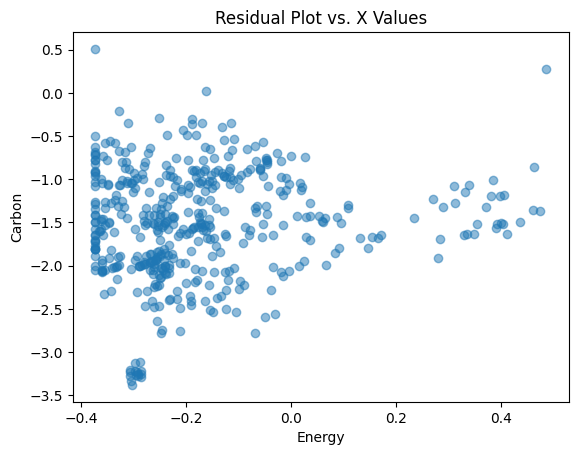

In [309]:
# x values versus residuals
plt.scatter(X[:, 1:2], res, alpha=0.5)
plt.xlabel("Energy")
plt.ylabel("Carbon")
plt.title("Residual Plot vs. X Values")
plt.show()

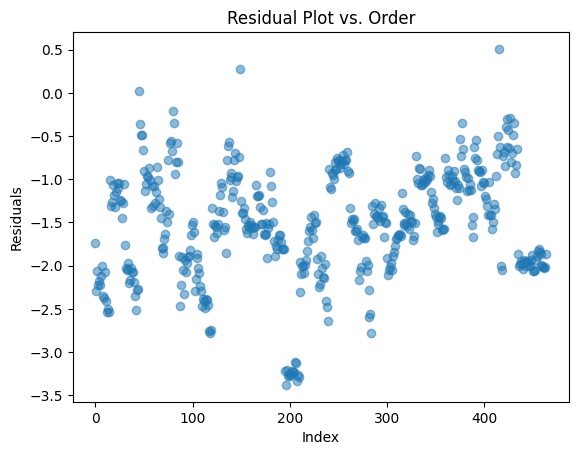

In [310]:
# residuals versus order
plt.scatter(range(len(X[:,1:2])), res, alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual Plot vs. Order")
plt.show()